<a href="https://colab.research.google.com/github/Huyvubk/Math/blob/main/gradient_programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bài 1: Hãy đạo hàm tổng quát những dạng sau (viết tay):

Tính dy/dx = 

### 1a:

<img src="https://i.imgur.com/ZAEPZWM.jpg" alt="" width="350"/>

### 1b:

<img src="https://i.imgur.com/yfjgsna.jpg" alt="" width="350"/>

### 1c:

<img src="https://i.imgur.com/zj1ohFs.jpg" alt="" width="350"/>

#### Bài giải:

<img src="https://i.imgur.com/sbdZtxV.jpg" alt=""/>

---

## Bài 2: Ứng dụng đạo hàm - sử dụng 2 cách (chỉ cần tìm 1 nghiệm) để tìm nghiệm của phương trình: 
- Cách 1: Đạo hàm thủ công
- Cách 2: Đạo hàm tự động 

### 2a:

<img src="https://i.imgur.com/jJoVatL.jpg" alt="" width="350"/>


### 2b:

<img src="https://i.imgur.com/ggsK2Zj.jpg" alt="" width="350"/>


> Tham khảo cách chứng minh và tìm nghiệm phương pháp lặp Newton Raphson: 
https://colab.research.google.com/drive/1R7nshsTvCFS4fndbXZrXkOFO9UwIsJJt

#### Bài giải:

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def d_f(f, x, epsilon=1.0e-7):
    return (f(x + epsilon/2)
            - f(x - epsilon/2))/epsilon

---

In [4]:
#https://toanmath.com/2018/09/cach-giai-phuong-trinh-bac-4.html
def f(x):
    return (x+4)*(x+6)*(x-2)*(x-12)-25*(x**2)

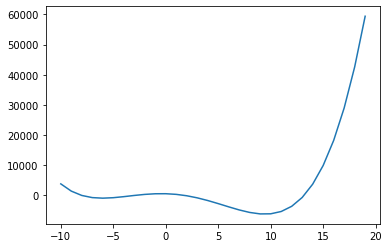

In [5]:
x = np.arange(-10, 20, 1)
plt.plot(x, f(x))

In [6]:
epochs = 1000
x = 9
for _ in range(epochs):
    x = x - f(x)/d_f(f, x)
print(x)

-8.0


In [7]:
#https://toanmath.com/2018/09/cach-giai-phuong-trinh-bac-4.html
def f(x):
    return x**4-8*(x**3)+21*(x**2)-24*x+9

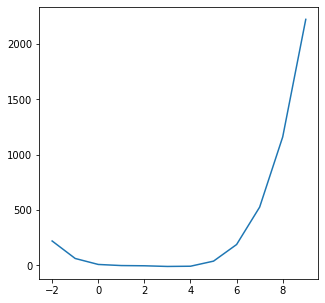

In [8]:
x = np.arange(-2, 10, 1)
plt.figure(figsize=(5,5))
plt.plot(x, f(x))

In [9]:
epochs = 1000
x = 2
for _ in range(epochs):
    x = x - f(x)/d_f(f, x)
print(x)

0.6972243622680052


In [10]:
(5-(13**(0.5)))/2

0.6972243622680054

---

## Bài 3: Ứng dụng đạo hàm - sử dụng 2 cách để tìm cực tiểu:
- Cách 1: Đạo hàm thủ công
- Cách 2: Đạo hàm tự động 

### 3a

$z=2x^4+y^4-4x^2+2y^2$

### 3b

$z = 2x^2+3y^2-e^{-(x^2+y^2)}$

#### Bài giải:

In [11]:
# From scratch
def d_vec_to_vec(f, w, epsilon=1e-7):
    result = []
    w = np.array(w, dtype=np.float64).reshape(-1, 1)
    for i in range(w.shape[0]):
        w_t = w.copy()
        w_p = w.copy()
        w_t[i] += epsilon/2
        w_p[i] -= epsilon/2
        result.append((f(w_t) - f(w_p))/epsilon)
    return np.concatenate(result, -1)

$z=2x^4+y^4-4x^2+2y^2$

In [12]:
xmin, xmax, xstep = -1, 1, 1
ymin, ymax, ystep = -1, 1, 1

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = f1([x, y])

fig,ax=plt.subplots(1,1)
cp = ax.contourf(x, y, z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

NameError: ignored

In [ ]:
#http://theza2.mobie.in/goc-hoc-tap/giai-tich-I/cuc-tri-ham-2-bien
def f1(w):
    x,y = w
    return 2*(x**4) + y**4 - 4*(x**2) + 2*(y**2)

In [ ]:
x = 1.0
y = 1.0
lr = 0.01
epoch = 1000
f_val = []
for _ in range(epoch):
    z = f1([x,y])
    dx, dy = d_vec_to_vec(f1, [x,y])
    x -= dx*lr
    y -= dy*lr
    f_val.append(z)
plt.plot(f_val)
print(f"min = {f_val[-1]} with x,y={x,y}")

$z = 2x^2+3y^2-e^{-(x^2+y^2)}$

In [13]:
#http://theza2.mobie.in/goc-hoc-tap/giai-tich-I/cuc-tri-ham-2-bien
def f2(w):
    x, y = w
    return 2*(x**3) + 3*(y**2) - np.exp(-(x**2+y**2))

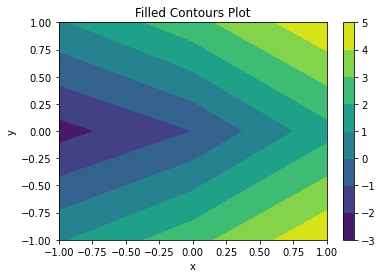

In [14]:
xmin, xmax, xstep = -1, 1, 1
ymin, ymax, ystep = -1, 1, 1

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = f2([x, y])

fig,ax=plt.subplots(1,1)
cp = ax.contourf(x, y, z)
fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Filled Contours Plot')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

min = -1.0 with x,y=(5.763158839044991e-10, 4.551026222543442e-12)


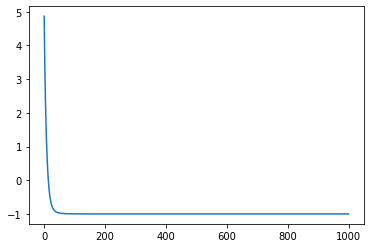

In [15]:
x = 1.0
y = 1.0
lr = 0.01
epoch = 1000
f_val = []
for _ in range(epoch):
    z = f2([x,y])
    dx, dy = d_vec_to_vec(f2, [x,y])
    x -= dx*lr
    y -= dy*lr
    f_val.append(z)
plt.plot(f_val)
print(f"min = {f_val[-1]} with x,y={x,y}")

---

## Bài 4: Ứng dụng đạo hàm - sử dụng 2 cách để giải bài toán Linear Regression:
- Cách 1: Đạo hàm thủ công
- Cách 2: Đạo hàm tự động (Numberical Differentiation)

> data (advertising.csv): https://drive.google.com/file/d/1joUbtLNSTmXc_fyuW2f9Af1Y0RPNSB6I/view?usp=sharing

> data (BostonHousing.csv): https://drive.google.com/file/d/18Nh-Vh1QJmFA0DWeEYr163svN6ABm-TN/view?usp=sharing

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
# From scratch
def d_vec_to_vec(f, w, epsilon=1e-7):
    result = []
    w = np.array(w, dtype=np.float64).reshape(-1, 1)
    for i in range(w.shape[0]):
        w_t = w.copy()
        w_p = w.copy()
        w_t[i] += epsilon/2
        w_p[i] -= epsilon/2
        result.append((f(w_t) - f(w_p))/epsilon)
    return np.concatenate(result, -1)

In [36]:
data = np.genfromtxt("/content/drive/MyDrive/Data/advertising.csv", delimiter=',', skip_header=True)

In [38]:
x = data[:, :-1]
y = data[:, -1:]

In [39]:
n_sample, n_features = x.shape # Lấy số sample, và số features

In [40]:
x = (x - x.mean())/x.std()

In [41]:
x = np.concatenate((x, np.ones((n_sample, 1))), axis = 1) # Thêm cột 1 vào x

In [42]:
def linear(const):
    def handle(x):
        return const@x
    return handle

In [43]:
def mean_square_error(const):
    def handle(x):
        return np.mean((const-x)**2, keepdims=True)
    return handle

In [44]:
# init parameters (weight, learning_rate, epoch, batch_size)
w = np.random.rand(n_features + 1, 1)
learning_rate = 0.01
batch_size = n_sample
n_epochs = 100


#for debug
losses = []

In [45]:
# Tìm w, b
for epoch in range(n_epochs):
    
    # May be shufle

    for i in range(0, n_sample, batch_size):

        # pick sample
        x_i = x[i:i+batch_size, :]
        y_i = y[i:i+batch_size]

        # predict
        y_pred = linear(x_i)(w)
        
        # loss (debug)
        l = mean_square_error(y_i)(y_pred) # np.abs(o - y_i)
        losses.extend(l)

        # compute gradient (d_weight)
        dw = (d_vec_to_vec(mean_square_error(y_i), y_pred) @ d_vec_to_vec(linear(x_i), w)).T
        
        # Update weight
        w = w - learning_rate*dw      


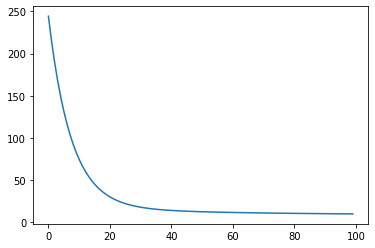

In [46]:
plt.plot(losses);

In [48]:
# Evaluate
np.abs(x.dot(w) - y).mean()

2.5643165112515827

---